# Simulated Annealing and Leaves
--------------

Run Simulated Annealing with Monte Carlo move consisting of: 
* pick a random floppy variable
* grow a seaweed
* flip all variables touched by the seaweed

**Goal**: see whether we get better results with graphs with more leaves

In [41]:
using Printf, Plots
include("../code/headers.jl")
include("../code/SimulationNEW.jl")

With graph size $n=1000$, expose leaves via $b$-reduction with $b \in [1, 3, 5, 10, 20, 50, 100, 200, 400]$.

_Note_ : the number of factors $m$ is always the same! If for example $b=4$, a graph with $m+4$ factors is built, then $4$ are removed.

Run compression over `niter` random {graph, source vector} instances

In [50]:
q = 2
n = 1000
m = 400
bvals = [1, 3, 5, 10, 20, 50, 100, 200, 400]
niter = 100
randseed = 1234;

Cooling schedule for Simulated Annealing: $\beta_{overlap} \in [10^{-1}, 10^0, 10^1]$

In [51]:
sims = Vector{Simulation{SA}}(undef, length(bvals))
sa = SA(mc_move=MetropSmallJumps(), nsamples=100, betas=[Inf 0.1; Inf 1.0; Inf 10.0;]);

In [52]:
time_SA = @timed for (i,b) in enumerate(bvals)
    println("##### b=$b. $i of $(length(bvals)) #####")
    sims[i] = Simulation(q, n, m, sa, b=b, niter=niter, verbose=true, randseed=randseed+i, showprogress=false)
end

##### b=1. 1 of 9 #####
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.472. Acceptance 89%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.443. Acceptance 43%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.422. Acceptance 18%
# Finished iter 1 of 100: Parity 0. Distortion 0.422 at β₁=Inf, β₂=10.0. Acceptance: [0.89, 0.43, 0.18].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.463. Acceptance 87%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.428. Acceptance 37%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.409. Acceptance 21%
# Finished iter 2 of 100: Parity 0. Distortion 0.409 at β₁=Inf, β₂=10.0. Acceptance: [0.87, 0.37, 0.21].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.484. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.442. Acceptance 45%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.424. Acceptance 20%
# Finished iter 3 of 100: Parity 0. Distortion 0.424 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.45, 0.2].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Dis

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.438. Acceptance 47%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.413. Acceptance 20%
# Finished iter 27 of 100: Parity 0. Distortion 0.413 at β₁=Inf, β₂=10.0. Acceptance: [0.84, 0.47, 0.2].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.485. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.427. Acceptance 48%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.426. Acceptance 6%
# Finished iter 28 of 100: Parity 0. Distortion 0.426 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.48, 0.06].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.466. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.456. Acceptance 48%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.441. Acceptance 16%
# Finished iter 29 of 100: Parity 0. Distortion 0.441 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.48, 0.16].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.447. Acceptance 81%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.424. Acceptan

Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.447. Acceptance 19%
# Finished iter 53 of 100: Parity 0. Distortion 0.447 at β₁=Inf, β₂=10.0. Acceptance: [0.86, 0.43, 0.19].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.491. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.446. Acceptance 49%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.42. Acceptance 21%
# Finished iter 54 of 100: Parity 0. Distortion 0.420 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.49, 0.21].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.475. Acceptance 86%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.448. Acceptance 33%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.443. Acceptance 5%
# Finished iter 55 of 100: Parity 0. Distortion 0.443 at β₁=Inf, β₂=10.0. Acceptance: [0.86, 0.33, 0.05].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.465. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.429. Acceptance 46%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.403. Accep

Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.485. Acceptance 88%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.456. Acceptance 40%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.438. Acceptance 15%
# Finished iter 80 of 100: Parity 0. Distortion 0.438 at β₁=Inf, β₂=10.0. Acceptance: [0.88, 0.4, 0.15].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.472. Acceptance 83%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.45. Acceptance 32%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.437. Acceptance 15%
# Finished iter 81 of 100: Parity 0. Distortion 0.437 at β₁=Inf, β₂=10.0. Acceptance: [0.83, 0.32, 0.15].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.472. Acceptance 85%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.439. Acceptance 35%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.422. Acceptance 16%
# Finished iter 82 of 100: Parity 0. Distortion 0.422 at β₁=Inf, β₂=10.0. Acceptance: [0.85, 0.35, 0.16].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.486. Accept

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.436. Acceptance 51%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.422. Acceptance 20%
# Finished iter 6 of 100: Parity 0. Distortion 0.422 at β₁=Inf, β₂=10.0. Acceptance: [0.94, 0.51, 0.2].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.474. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.425. Acceptance 44%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.411. Acceptance 17%
# Finished iter 7 of 100: Parity 0. Distortion 0.411 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.44, 0.17].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.48. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.447. Acceptance 52%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.425. Acceptance 26%
# Finished iter 8 of 100: Parity 0. Distortion 0.425 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.52, 0.26].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.506. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.468. Acceptance

Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.431. Acceptance 22%
# Finished iter 32 of 100: Parity 0. Distortion 0.431 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.44, 0.22].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.461. Acceptance 86%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.44. Acceptance 38%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.414. Acceptance 17%
# Finished iter 33 of 100: Parity 0. Distortion 0.414 at β₁=Inf, β₂=10.0. Acceptance: [0.86, 0.38, 0.17].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.48. Acceptance 84%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.451. Acceptance 35%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.436. Acceptance 21%
# Finished iter 34 of 100: Parity 0. Distortion 0.436 at β₁=Inf, β₂=10.0. Acceptance: [0.84, 0.35, 0.21].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.473. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.442. Acceptance 51%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.432. Accept

Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.457. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.439. Acceptance 46%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.414. Acceptance 21%
# Finished iter 59 of 100: Parity 0. Distortion 0.414 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.46, 0.21].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.464. Acceptance 88%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.432. Acceptance 43%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.412. Acceptance 20%
# Finished iter 60 of 100: Parity 0. Distortion 0.412 at β₁=Inf, β₂=10.0. Acceptance: [0.88, 0.43, 0.2].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.47. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.44. Acceptance 45%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.411. Acceptance 27%
# Finished iter 61 of 100: Parity 0. Distortion 0.411 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.45, 0.27].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.466. Accepta

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.42. Acceptance 40%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.405. Acceptance 12%
# Finished iter 85 of 100: Parity 0. Distortion 0.405 at β₁=Inf, β₂=10.0. Acceptance: [0.86, 0.4, 0.12].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.478. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.44. Acceptance 49%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.414. Acceptance 20%
# Finished iter 86 of 100: Parity 0. Distortion 0.414 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.49, 0.2].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.476. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.437. Acceptance 47%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.419. Acceptance 23%
# Finished iter 87 of 100: Parity 0. Distortion 0.419 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.47, 0.23].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.486. Acceptance 86%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.457. Acceptance

Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.437. Acceptance 18%
# Finished iter 11 of 100: Parity 0. Distortion 0.437 at β₁=Inf, β₂=10.0. Acceptance: [0.93, 0.4, 0.18].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.483. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.456. Acceptance 43%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.431. Acceptance 19%
# Finished iter 12 of 100: Parity 0. Distortion 0.431 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.43, 0.19].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.487. Acceptance 94%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.432. Acceptance 51%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.407. Acceptance 26%
# Finished iter 13 of 100: Parity 0. Distortion 0.407 at β₁=Inf, β₂=10.0. Acceptance: [0.94, 0.51, 0.26].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.491. Acceptance 89%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.448. Acceptance 44%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.429. Acce

Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.499. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.435. Acceptance 48%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.413. Acceptance 22%
# Finished iter 38 of 100: Parity 0. Distortion 0.413 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.48, 0.22].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.457. Acceptance 87%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.431. Acceptance 47%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.407. Acceptance 32%
# Finished iter 39 of 100: Parity 0. Distortion 0.407 at β₁=Inf, β₂=10.0. Acceptance: [0.87, 0.47, 0.32].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.484. Acceptance 89%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.442. Acceptance 46%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.424. Acceptance 15%
# Finished iter 40 of 100: Parity 0. Distortion 0.424 at β₁=Inf, β₂=10.0. Acceptance: [0.89, 0.46, 0.15].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.452. Accep

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.452. Acceptance 44%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.436. Acceptance 19%
# Finished iter 64 of 100: Parity 0. Distortion 0.436 at β₁=Inf, β₂=10.0. Acceptance: [0.86, 0.44, 0.19].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.491. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.462. Acceptance 50%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.445. Acceptance 22%
# Finished iter 65 of 100: Parity 0. Distortion 0.445 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.5, 0.22].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.488. Acceptance 88%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.454. Acceptance 49%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.424. Acceptance 27%
# Finished iter 66 of 100: Parity 0. Distortion 0.424 at β₁=Inf, β₂=10.0. Acceptance: [0.88, 0.49, 0.27].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.47. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.433. Accept

Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.416. Acceptance 24%
# Finished iter 90 of 100: Parity 0. Distortion 0.416 at β₁=Inf, β₂=10.0. Acceptance: [0.89, 0.5, 0.24].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.477. Acceptance 89%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.436. Acceptance 59%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.415. Acceptance 20%
# Finished iter 91 of 100: Parity 0. Distortion 0.415 at β₁=Inf, β₂=10.0. Acceptance: [0.89, 0.59, 0.2].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.491. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.46. Acceptance 49%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.428. Acceptance 24%
# Finished iter 92 of 100: Parity 0. Distortion 0.428 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.49, 0.24].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.461. Acceptance 89%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.425. Acceptance 40%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.407. Accept

Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.478. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.457. Acceptance 51%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.425. Acceptance 32%
# Finished iter 17 of 100: Parity 0. Distortion 0.425 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.51, 0.32].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.487. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.435. Acceptance 56%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.414. Acceptance 24%
# Finished iter 18 of 100: Parity 0. Distortion 0.414 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.56, 0.24].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.474. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.437. Acceptance 44%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.422. Acceptance 23%
# Finished iter 19 of 100: Parity 0. Distortion 0.422 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.44, 0.23].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.486. Accept

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.437. Acceptance 47%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.421. Acceptance 18%
# Finished iter 56 of 100: Parity 0. Distortion 0.421 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.47, 0.18].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.468. Acceptance 88%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.443. Acceptance 56%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.408. Acceptance 35%
# Finished iter 57 of 100: Parity 0. Distortion 0.408 at β₁=Inf, β₂=10.0. Acceptance: [0.88, 0.56, 0.35].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.444. Acceptance 86%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.425. Acceptance 39%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.405. Acceptance 22%
# Finished iter 58 of 100: Parity 0. Distortion 0.405 at β₁=Inf, β₂=10.0. Acceptance: [0.86, 0.39, 0.22].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.49. Acceptance 93%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.444. Accept

Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.415. Acceptance 27%
# Finished iter 82 of 100: Parity 0. Distortion 0.415 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.41, 0.27].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.468. Acceptance 93%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.438. Acceptance 47%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.413. Acceptance 28%
# Finished iter 83 of 100: Parity 0. Distortion 0.413 at β₁=Inf, β₂=10.0. Acceptance: [0.93, 0.47, 0.28].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.448. Acceptance 88%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.411. Acceptance 50%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.394. Acceptance 18%
# Finished iter 84 of 100: Parity 0. Distortion 0.394 at β₁=Inf, β₂=10.0. Acceptance: [0.88, 0.5, 0.18].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.475. Acceptance 93%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.454. Acceptance 48%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.419. Acce

Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.49. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.448. Acceptance 58%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.429. Acceptance 29%
# Finished iter 9 of 100: Parity 0. Distortion 0.429 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.58, 0.29].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.474. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.448. Acceptance 55%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.416. Acceptance 36%
# Finished iter 10 of 100: Parity 0. Distortion 0.416 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.55, 0.36].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.471. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.441. Acceptance 57%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.419. Acceptance 22%
# Finished iter 11 of 100: Parity 0. Distortion 0.419 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.57, 0.22].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.472. Accepta

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.407. Acceptance 49%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.393. Acceptance 26%
# Finished iter 35 of 100: Parity 0. Distortion 0.393 at β₁=Inf, β₂=10.0. Acceptance: [0.89, 0.49, 0.26].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.487. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.445. Acceptance 59%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.415. Acceptance 27%
# Finished iter 36 of 100: Parity 0. Distortion 0.415 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.59, 0.27].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.457. Acceptance 89%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.418. Acceptance 55%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.399. Acceptance 24%
# Finished iter 37 of 100: Parity 0. Distortion 0.399 at β₁=Inf, β₂=10.0. Acceptance: [0.89, 0.55, 0.24].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.481. Acceptance 89%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.434. Accep

Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.422. Acceptance 22%
# Finished iter 61 of 100: Parity 0. Distortion 0.422 at β₁=Inf, β₂=10.0. Acceptance: [0.87, 0.55, 0.22].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.49. Acceptance 89%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.439. Acceptance 57%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.423. Acceptance 26%
# Finished iter 62 of 100: Parity 0. Distortion 0.423 at β₁=Inf, β₂=10.0. Acceptance: [0.89, 0.57, 0.26].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.5. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.451. Acceptance 58%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.422. Acceptance 24%
# Finished iter 63 of 100: Parity 0. Distortion 0.422 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.58, 0.24].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.462. Acceptance 87%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.432. Acceptance 56%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.414. Accept

Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.469. Acceptance 86%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.461. Acceptance 58%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.423. Acceptance 31%
# Finished iter 88 of 100: Parity 0. Distortion 0.423 at β₁=Inf, β₂=10.0. Acceptance: [0.86, 0.58, 0.31].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.45. Acceptance 88%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.423. Acceptance 48%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.412. Acceptance 24%
# Finished iter 89 of 100: Parity 0. Distortion 0.412 at β₁=Inf, β₂=10.0. Acceptance: [0.88, 0.48, 0.24].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.478. Acceptance 87%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.431. Acceptance 57%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.404. Acceptance 20%
# Finished iter 90 of 100: Parity 0. Distortion 0.404 at β₁=Inf, β₂=10.0. Acceptance: [0.87, 0.57, 0.2].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.466. Accept

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.44. Acceptance 53%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.398. Acceptance 38%
# Finished iter 14 of 100: Parity 0. Distortion 0.398 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.53, 0.38].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.475. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.437. Acceptance 64%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.415. Acceptance 34%
# Finished iter 15 of 100: Parity 0. Distortion 0.415 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.64, 0.34].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.488. Acceptance 93%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.444. Acceptance 53%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.42. Acceptance 29%
# Finished iter 16 of 100: Parity 0. Distortion 0.420 at β₁=Inf, β₂=10.0. Acceptance: [0.93, 0.53, 0.29].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.488. Acceptance 89%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.431. Accepta

Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.417. Acceptance 30%
# Finished iter 40 of 100: Parity 0. Distortion 0.417 at β₁=Inf, β₂=10.0. Acceptance: [0.88, 0.57, 0.3].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.477. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.439. Acceptance 55%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.412. Acceptance 24%
# Finished iter 41 of 100: Parity 0. Distortion 0.412 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.55, 0.24].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.486. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.441. Acceptance 56%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.415. Acceptance 26%
# Finished iter 42 of 100: Parity 0. Distortion 0.415 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.56, 0.26].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.464. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.402. Acceptance 57%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.377. Acce

Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.468. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.433. Acceptance 52%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.401. Acceptance 23%
# Finished iter 67 of 100: Parity 0. Distortion 0.401 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.52, 0.23].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.479. Acceptance 94%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.442. Acceptance 56%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.41. Acceptance 30%
# Finished iter 68 of 100: Parity 0. Distortion 0.410 at β₁=Inf, β₂=10.0. Acceptance: [0.94, 0.56, 0.3].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.483. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.43. Acceptance 53%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.403. Acceptance 28%
# Finished iter 69 of 100: Parity 0. Distortion 0.403 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.53, 0.28].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.489. Acceptan

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.434. Acceptance 58%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.408. Acceptance 27%
# Finished iter 93 of 100: Parity 0. Distortion 0.408 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.58, 0.27].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.476. Acceptance 89%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.421. Acceptance 56%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.401. Acceptance 21%
# Finished iter 94 of 100: Parity 0. Distortion 0.401 at β₁=Inf, β₂=10.0. Acceptance: [0.89, 0.56, 0.21].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.487. Acceptance 93%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.445. Acceptance 49%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.422. Acceptance 31%
# Finished iter 95 of 100: Parity 0. Distortion 0.422 at β₁=Inf, β₂=10.0. Acceptance: [0.93, 0.49, 0.31].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.481. Acceptance 93%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.42. Accept

Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.397. Acceptance 25%
# Finished iter 19 of 100: Parity 0. Distortion 0.397 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.6, 0.25].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.488. Acceptance 96%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.449. Acceptance 63%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.413. Acceptance 36%
# Finished iter 20 of 100: Parity 0. Distortion 0.413 at β₁=Inf, β₂=10.0. Acceptance: [0.96, 0.63, 0.36].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.477. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.437. Acceptance 58%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.417. Acceptance 28%
# Finished iter 21 of 100: Parity 0. Distortion 0.417 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.58, 0.28].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.474. Acceptance 95%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.445. Acceptance 57%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.424. Acce

Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.481. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.437. Acceptance 51%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.426. Acceptance 27%
# Finished iter 46 of 100: Parity 0. Distortion 0.426 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.51, 0.27].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.502. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.445. Acceptance 63%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.417. Acceptance 32%
# Finished iter 47 of 100: Parity 0. Distortion 0.417 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.63, 0.32].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.463. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.439. Acceptance 49%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.428. Acceptance 29%
# Finished iter 48 of 100: Parity 0. Distortion 0.428 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.49, 0.29].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.482. Acce

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.436. Acceptance 56%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.419. Acceptance 21%
# Finished iter 72 of 100: Parity 0. Distortion 0.419 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.56, 0.21].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.482. Acceptance 93%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.449. Acceptance 59%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.417. Acceptance 37%
# Finished iter 73 of 100: Parity 0. Distortion 0.417 at β₁=Inf, β₂=10.0. Acceptance: [0.93, 0.59, 0.37].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.486. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.445. Acceptance 54%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.42. Acceptance 24%
# Finished iter 74 of 100: Parity 0. Distortion 0.420 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.54, 0.24].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.486. Acceptance 89%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.458. Accepta

Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.416. Acceptance 30%
# Finished iter 98 of 100: Parity 0. Distortion 0.416 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.6, 0.3].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.488. Acceptance 90%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.452. Acceptance 55%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.429. Acceptance 28%
# Finished iter 99 of 100: Parity 0. Distortion 0.429 at β₁=Inf, β₂=10.0. Acceptance: [0.9, 0.55, 0.28].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.477. Acceptance 94%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.45. Acceptance 64%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.434. Acceptance 30%
# Finished iter 100 of 100: Parity 0. Distortion 0.434 at β₁=Inf, β₂=10.0. Acceptance: [0.94, 0.64, 0.3].
##### b=200. 8 of 9 #####
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.477. Acceptance 95%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.447. Acceptance 58%
Temperature 3 of 3:(β₁=Inf,β₂=10.0).

Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.492. Acceptance 96%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.457. Acceptance 70%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.432. Acceptance 33%
# Finished iter 25 of 100: Parity 0. Distortion 0.432 at β₁=Inf, β₂=10.0. Acceptance: [0.96, 0.7, 0.33].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.476. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.449. Acceptance 59%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.432. Acceptance 36%
# Finished iter 26 of 100: Parity 0. Distortion 0.432 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.59, 0.36].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.482. Acceptance 95%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.447. Acceptance 60%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.424. Acceptance 32%
# Finished iter 27 of 100: Parity 0. Distortion 0.424 at β₁=Inf, β₂=10.0. Acceptance: [0.95, 0.6, 0.32].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.491. Accept

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.427. Acceptance 64%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.4. Acceptance 27%
# Finished iter 51 of 100: Parity 0. Distortion 0.400 at β₁=Inf, β₂=10.0. Acceptance: [0.93, 0.64, 0.27].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.469. Acceptance 95%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.433. Acceptance 54%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.419. Acceptance 28%
# Finished iter 52 of 100: Parity 0. Distortion 0.419 at β₁=Inf, β₂=10.0. Acceptance: [0.95, 0.54, 0.28].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.467. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.464. Acceptance 67%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.422. Acceptance 37%
# Finished iter 53 of 100: Parity 0. Distortion 0.422 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.67, 0.37].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.468. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.443. Accept

Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.432. Acceptance 42%
# Finished iter 77 of 100: Parity 0. Distortion 0.432 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.69, 0.42].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.467. Acceptance 97%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.446. Acceptance 61%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.421. Acceptance 41%
# Finished iter 78 of 100: Parity 0. Distortion 0.421 at β₁=Inf, β₂=10.0. Acceptance: [0.97, 0.61, 0.41].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.48. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.457. Acceptance 61%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.434. Acceptance 32%
# Finished iter 79 of 100: Parity 0. Distortion 0.434 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.61, 0.32].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.443. Acceptance 85%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.416. Acceptance 54%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.401. Acce

Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.483. Acceptance 94%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.455. Acceptance 59%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.44. Acceptance 25%
# Finished iter 4 of 100: Parity 0. Distortion 0.440 at β₁=Inf, β₂=10.0. Acceptance: [0.94, 0.59, 0.25].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.506. Acceptance 97%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.472. Acceptance 61%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.458. Acceptance 32%
# Finished iter 5 of 100: Parity 0. Distortion 0.458 at β₁=Inf, β₂=10.0. Acceptance: [0.97, 0.61, 0.32].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.485. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.461. Acceptance 63%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.446. Acceptance 27%
# Finished iter 6 of 100: Parity 0. Distortion 0.446 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.63, 0.27].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.486. Acceptan

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.446. Acceptance 66%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.435. Acceptance 25%
# Finished iter 30 of 100: Parity 0. Distortion 0.435 at β₁=Inf, β₂=10.0. Acceptance: [0.93, 0.66, 0.25].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.447. Acceptance 92%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.419. Acceptance 65%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.399. Acceptance 27%
# Finished iter 31 of 100: Parity 0. Distortion 0.399 at β₁=Inf, β₂=10.0. Acceptance: [0.92, 0.65, 0.27].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.482. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.465. Acceptance 59%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.447. Acceptance 30%
# Finished iter 32 of 100: Parity 0. Distortion 0.447 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.59, 0.3].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.466. Acceptance 94%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.441. Accep

Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.447. Acceptance 32%
# Finished iter 56 of 100: Parity 0. Distortion 0.447 at β₁=Inf, β₂=10.0. Acceptance: [0.94, 0.68, 0.32].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.497. Acceptance 95%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.466. Acceptance 66%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.45. Acceptance 25%
# Finished iter 57 of 100: Parity 0. Distortion 0.450 at β₁=Inf, β₂=10.0. Acceptance: [0.95, 0.66, 0.25].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.493. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.464. Acceptance 59%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.445. Acceptance 28%
# Finished iter 58 of 100: Parity 0. Distortion 0.445 at β₁=Inf, β₂=10.0. Acceptance: [0.91, 0.59, 0.28].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.496. Acceptance 93%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.451. Acceptance 64%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.436. Acce

Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.461. Acceptance 66%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.444. Acceptance 29%
# Finished iter 83 of 100: Parity 0. Distortion 0.444 at β₁=Inf, β₂=10.0. Acceptance: [0.95, 0.66, 0.29].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.484. Acceptance 94%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.461. Acceptance 74%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.444. Acceptance 23%
# Finished iter 84 of 100: Parity 0. Distortion 0.444 at β₁=Inf, β₂=10.0. Acceptance: [0.94, 0.74, 0.23].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.471. Acceptance 96%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.452. Acceptance 60%
Temperature 3 of 3:(β₁=Inf,β₂=10.0). Distortion 0.435. Acceptance 35%
# Finished iter 85 of 100: Parity 0. Distortion 0.435 at β₁=Inf, β₂=10.0. Acceptance: [0.96, 0.6, 0.35].
Temperature 1 of 3:(β₁=Inf,β₂=0.1). Distortion 0.477. Acceptance 91%
Temperature 2 of 3:(β₁=Inf,β₂=1.0). Distortion 0.468. Accep

(value = nothing, time = 8629.118237264, bytes = 22186945280944, gctime = 1724.008811322, gcstats = Base.GC_Diff(22186945280944, 2714400, 0, 9383676987, 1601189407, 0, 1724008811322, 333425, 15))

In [53]:
println("Runtime for simulated annealing: ", Int(round(time_SA.time)), "s")

Runtime for simulated annealing: 8629s


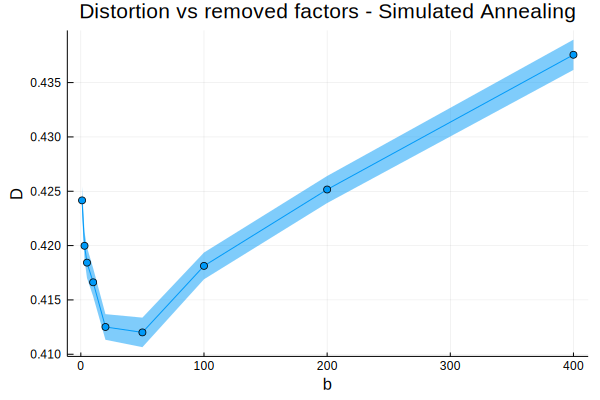

In [54]:
dist = distortion.(sims)
avg_dist = mean.(dist)
sd_dist = std.(dist) ./ sqrt(niter)
pl = Plots.plot(bvals, avg_dist, xlabel="b", ylabel="D", label="", ribbon=sd_dist, marker=:circle)
title!("Distortion vs removed factors - Simulated Annealing")

$b$-reduction seems to indeed have some effect

## Compare with Max-sum

Run Max-sum on the same graphs and observe differences

In [55]:
sims_ms = Vector{Simulation{MS}}(undef, length(bvals))
ms = MS(maxiter=200, gamma=5e-3);

In [56]:
for (i,b) in enumerate(bvals)
    println("##### b=$b. $i of $(length(bvals)) #####")
    sims_ms[i] = Simulation(q,n,m,ms,b=b, niter=niter, verbose=true, randseed=randseed+i, showprogress=true)
end

##### b=1. 1 of 9 #####


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 1 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 2 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:06
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 3 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 4 of 100: C after 22 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 5 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 6 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 7 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 8 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 9 of 100: C after 38 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 10 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 11 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 12 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5  36%|██████████████▊                          |  ETA: 0:00:04

# Finished iter 13 of 100: C after 74 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 14 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 15 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 16 of 100: U after 200 iters, 5 trials. Parity 5. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 17 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 18 of 100: C after 36 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 19 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 20 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
# Finished iter 21 of 100: C after 35 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 22 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 23 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
# Finished iter 24 of 100: C after 20 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 25 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 26 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 27 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 28 of 100: C after 17 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 29 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 30 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5  18%|███████▋                                 |  ETA: 0:00:05

# Finished iter 31 of 100: C after 52 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 32 of 100: C after 42 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 33 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.
# Finished iter 34 of 100: C after 33 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 35 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 36 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5  18%|███████▏                                 |  ETA: 0:00:05

# Finished iter 37 of 100: C after 59 iters, 4 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 38 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5  19%|███████▊                                 |  ETA: 0:00:04

# Finished iter 39 of 100: C after 49 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5  18%|███████▋                                 |  ETA: 0:00:05

# Finished iter 40 of 100: C after 68 iters, 4 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 41 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 42 of 100: U after 200 iters, 5 trials. Parity 5. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 43 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  37%|███████████████▏                         |  ETA: 0:00:03

# Finished iter 44 of 100: C after 77 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 45 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 46 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 47 of 100: U after 200 iters, 5 trials. Parity 6. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 48 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5  36%|███████████████                          |  ETA: 0:00:04

# Finished iter 49 of 100: C after 102 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 50 of 100: C after 44 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 51 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
# Finished iter 52 of 100: C after 31 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  18%|███████▋                                 |  ETA: 0:00:05

# Finished iter 53 of 100: C after 53 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 54 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 55 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 56 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 57 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 58 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 59 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 60 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 61 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 62 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 63 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 64 of 100: C after 25 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  19%|███████▊                                 |  ETA: 0:00:04

# Finished iter 65 of 100: C after 42 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 66 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
# Finished iter 67 of 100: C after 34 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 68 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 69 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5  38%|███████████████▍                         |  ETA: 0:00:03

# Finished iter 70 of 100: C after 79 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 71 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 72 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.
# Finished iter 73 of 100: C after 18 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 74 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 75 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 76 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 77 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
# Finished iter 78 of 100: C after 18 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 79 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 80 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 81 of 100: C after 27 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 82 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 83 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 84 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 85 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 86 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 87 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 88 of 100: C after 17 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 89 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 90 of 100: C after 30 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 91 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 92 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.
# Finished iter 93 of 100: C after 34 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 94 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 95 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 96 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 97 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 98 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 99 of 100: C after 15 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 100 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
##### b=3. 2 of 9 #####


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 1 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5  19%|███████▊                                 |  ETA: 0:00:04

# Finished iter 2 of 100: C after 70 iters, 1 trials. Parity 0. Distortion 0.10.
# Finished iter 3 of 100: C after 35 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 4 of 100: C after 44 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 5 of 100: C after 49 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 6 of 100: C after 56 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 7 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5  37%|███████████████▏                         |  ETA: 0:00:03

# Finished iter 8 of 100: C after 76 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 9 of 100: U after 200 iters, 5 trials. Parity 6. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 10 of 100: C after 23 iters, 4 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 11 of 100: C after 19 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 12 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 13 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 14 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 15 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 16 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 17 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:06
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 18 of 100: C after 15 iters, 5 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 19 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
# Finished iter 20 of 100: C after 18 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 21 of 100: C after 61 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 22 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 23 of 100: C after 22 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 24 of 100: C after 69 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 25 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 26 of 100: C after 65 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 27 of 100: C after 27 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 28 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 29 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  14%|██████                                   |  ETA: 0:00:06

# Finished iter 30 of 100: C after 37 iters, 2 trials. Parity 0. Distortion 0.11.
# Finished iter 31 of 100: C after 23 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:06
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:06
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 32 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 33 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 34 of 100: U after 200 iters, 5 trials. Parity 5. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 35 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 36 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 37 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 38 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 39 of 100: C after 24 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 40 of 100: C after 41 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 41 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 42 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 43 of 100: C after 15 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 44 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 45 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  18%|███████▏                                 |  ETA: 0:00:05

# Finished iter 46 of 100: C after 59 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 47 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 48 of 100: C after 48 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 49 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 50 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 51 of 100: C after 37 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 52 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 53 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5  36%|███████████████                          |  ETA: 0:00:04

# Finished iter 54 of 100: C after 88 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  18%|███████▋                                 |  ETA: 0:00:05

# Finished iter 55 of 100: C after 49 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 56 of 100: C after 12 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 57 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 58 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.
# Finished iter 59 of 100: C after 23 iters, 1 trials. Parity 0. Distortion 0.10.
# Finished iter 60 of 100: C after 20 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 61 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 62 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 63 of 100: C after 17 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 64 of 100: C after 29 iters, 3 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 65 of 100: C after 14 iters, 4 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 66 of 100: C after 20 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 67 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 68 of 100: C after 18 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 69 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 70 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5  18%|███████▏                                 |  ETA: 0:00:05

# Finished iter 71 of 100: C after 40 iters, 1 trials. Parity 0. Distortion 0.10.
# Finished iter 72 of 100: C after 19 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 73 of 100: C after 44 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 74 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 75 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 76 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 77 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5  18%|███████▏                                 |  ETA: 0:00:05

# Finished iter 78 of 100: C after 40 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 79 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 80 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 81 of 100: C after 18 iters, 3 trials. Parity 0. Distortion 0.11.
# Finished iter 82 of 100: C after 22 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 83 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 84 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 85 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 86 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 87 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 88 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 89 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 90 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 91 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 92 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 93 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 94 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 95 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 96 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 97 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 98 of 100: C after 15 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 99 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 100 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.
##### b=5. 3 of 9 #####
# Finished iter 1 of 100: C after 18 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 2 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:06
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 3 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 4 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5  18%|███████▏                                 |  ETA: 0:00:05

# Finished iter 5 of 100: C after 48 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  18%|███████▏                                 |  ETA: 0:00:05

# Finished iter 6 of 100: C after 41 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  32%|████████████▉                            |  ETA: 0:00:04

# Finished iter 7 of 100: C after 76 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:06
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 8 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:06


# Finished iter 9 of 100: C after 12 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 10 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 11 of 100: C after 27 iters, 1 trials. Parity 0. Distortion 0.10.
# Finished iter 12 of 100: C after 32 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 13 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 14 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 15 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 16 of 100: C after 21 iters, 3 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 17 of 100: C after 17 iters, 5 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 18 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 19 of 100: C after 16 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 20 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 21 of 100: C after 18 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 22 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 23 of 100: C after 31 iters, 2 trials. Parity 0. Distortion 0.11.
# Finished iter 24 of 100: C after 21 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 25 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 26 of 100: C after 32 iters, 2 trials. Parity 0. Distortion 0.10.
# Finished iter 27 of 100: C after 15 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 28 of 100: C after 15 iters, 4 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 29 of 100: C after 39 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 30 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 31 of 100: C after 27 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:06
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 32 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 33 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 34 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 35 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 36 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 37 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 38 of 100: C after 19 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 39 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 40 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 41 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.
# Finished iter 42 of 100: C after 15 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 43 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 44 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 45 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 46 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 47 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 48 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 49 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 50 of 100: C after 44 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 51 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 52 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 53 of 100: C after 70 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 54 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 55 of 100: C after 29 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 56 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 57 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 58 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 59 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 60 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 61 of 100: C after 41 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 62 of 100: C after 19 iters, 4 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 63 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 64 of 100: C after 39 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 65 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 66 of 100: C after 35 iters, 4 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 67 of 100: C after 13 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 68 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 69 of 100: C after 19 iters, 1 trials. Parity 0. Distortion 0.10.
# Finished iter 70 of 100: C after 33 iters, 1 trials. Parity 0. Distortion 0.10.
# Finished iter 71 of 100: C after 33 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 72 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 73 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
# Finished iter 74 of 100: C after 37 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 75 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 76 of 100: C after 11 iters, 1 trials. Parity 0. Distortion 0.10.
# Finished iter 77 of 100: C after 18 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 78 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 79 of 100: C after 28 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 80 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 81 of 100: C after 15 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 82 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 83 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 84 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 85 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 86 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 87 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 88 of 100: C after 48 iters, 5 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 89 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 90 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 91 of 100: C after 37 iters, 5 trials. Parity 0. Distortion 0.10.


Trial 1/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 92 of 100: C after 38 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 93 of 100: C after 44 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 94 of 100: C after 21 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 95 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 96 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 97 of 100: C after 38 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 98 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 99 of 100: U after 200 iters, 5 trials. Parity 7. Distortion 0.50.
# Finished iter 100 of 100: C after 34 iters, 1 trials. Parity 0. Distortion 0.11.
##### b=10. 4 of 9 #####


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 1 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 2 of 100: C after 28 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 3 of 100: C after 32 iters, 3 trials. Parity 0. Distortion 0.11.
# Finished iter 4 of 100: C after 32 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 5 of 100: C after 26 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 6 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 7 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 8 of 100: C after 24 iters, 2 trials. Parity 0. Distortion 0.10.
# Finished iter 9 of 100: C after 19 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 10 of 100: C after 42 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 11 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 12 of 100: C after 30 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5  18%|███████▋                                 |  ETA: 0:00:05

# Finished iter 13 of 100: C after 38 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 14 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 15 of 100: C after 41 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 16 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:06
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 17 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 18 of 100: C after 21 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 19 of 100: C after 71 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 20 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 21 of 100: C after 11 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 22 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 23 of 100: C after 29 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  19%|███████▊                                 |  ETA: 0:00:04

# Finished iter 24 of 100: C after 48 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 25 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 26 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 27 of 100: C after 20 iters, 2 trials. Parity 0. Distortion 0.10.
# Finished iter 28 of 100: C after 33 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 29 of 100: C after 31 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 30 of 100: C after 16 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 31 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 32 of 100: C after 28 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 33 of 100: C after 21 iters, 2 trials. Parity 0. Distortion 0.11.
# Finished iter 34 of 100: C after 24 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 35 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
# Finished iter 36 of 100: C after 25 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 37 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 45 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 46 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 47 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 48 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.
# Finished iter 49 of 100: C after 19 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 50 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 51 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 52 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 53 of 100: C after 35 iters, 2 trials. Parity 0. Distortion 0.11.
# Finished iter 54 of 100: C after 27 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 55 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 56 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 57 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 58 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 59 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 60 of 100: C after 38 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 61 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 62 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 63 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 64 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 65 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 66 of 100: C after 28 iters, 4 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 67 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 68 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 69 of 100: C after 45 iters, 3 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 70 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.
# Finished iter 71 of 100: C after 19 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 72 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 73 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 74 of 100: C after 25 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 75 of 100: C after 17 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 76 of 100: C after 22 iters, 2 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 77 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 78 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.
# Finished iter 79 of 100: C after 13 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 80 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 81 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 82 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 83 of 100: C after 33 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 84 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.
# Finished iter 85 of 100: C after 16 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 86 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
# Finished iter 87 of 100: C after 27 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  18%|███████▋                                 |  ETA: 0:00:05

# Finished iter 88 of 100: C after 62 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 89 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5  16%|██████▌                                  |  ETA: 0:00:05

# Finished iter 90 of 100: C after 41 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 91 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 92 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5  18%|███████▍                                 |  ETA: 0:00:05

# Finished iter 93 of 100: C after 52 iters, 4 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 94 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 95 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5  18%|███████▋                                 |  ETA: 0:00:05

# Finished iter 96 of 100: C after 53 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 97 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 98 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 99 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 100 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
##### b=20. 5 of 9 #####


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 1 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 2 of 100: C after 17 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 3 of 100: C after 10 iters, 3 trials. Parity 0. Distortion 0.11.
# Finished iter 4 of 100: C after 25 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 5 of 100: C after 25 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5  19%|███████▊                                 |  ETA: 0:00:04

# Finished iter 6 of 100: C after 50 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 7 of 100: C after 14 iters, 4 trials. Parity 0. Distortion 0.10.
# Finished iter 8 of 100: C after 16 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 9 of 100: C after 15 iters, 1 trials. Parity 0. Distortion 0.10.
# Finished iter 10 of 100: C after 35 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 11 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 12 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 13 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 14 of 100: C after 17 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 15 of 100: C after 21 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 16 of 100: C after 20 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 17 of 100: C after 14 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 18 of 100: C after 25 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 19 of 100: C after 9 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 20 of 100: C after 15 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 21 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 22 of 100: C after 22 iters, 2 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 23 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 24 of 100: C after 17 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 25 of 100: C after 17 iters, 2 trials. Parity 0. Distortion 0.12.
# Finished iter 26 of 100: C after 19 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 27 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 28 of 100: C after 22 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 29 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 30 of 100: C after 11 iters, 2 trials. Parity 0. Distortion 0.10.
# Finished iter 31 of 100: C after 12 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 32 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 33 of 100: C after 46 iters, 5 trials. Parity 0. Distortion 0.11.
# Finished iter 34 of 100: C after 14 iters, 1 trials. Parity 0. Distortion 0.12.
# Finished iter 35 of 100: C after 28 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 36 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 37 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 38 of 100: C after 27 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 39 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 40 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 41 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 42 of 100: C after 16 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 43 of 100: C after 23 iters, 4 trials. Parity 0. Distortion 0.11.
# Finished iter 44 of 100: C after 17 iters, 1 trials. Parity 0. Distortion 0.12.
# Finished iter 45 of 100: C after 25 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 46 of 100: C after 30 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 47 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 48 of 100: C after 13 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 49 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 50 of 100: C after 17 iters, 4 trials. Parity 0. Distortion 0.11.
# Finished iter 51 of 100: C after 17 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5  19%|███████▊                                 |  ETA: 0:00:04

# Finished iter 52 of 100: C after 49 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 53 of 100: C after 17 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5  19%|███████▊                                 |  ETA: 0:00:04

# Finished iter 54 of 100: C after 50 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 55 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 56 of 100: C after 20 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 57 of 100: C after 27 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  19%|███████▊                                 |  ETA: 0:00:04

# Finished iter 58 of 100: C after 41 iters, 1 trials. Parity 0. Distortion 0.12.
# Finished iter 59 of 100: C after 14 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 60 of 100: C after 14 iters, 4 trials. Parity 0. Distortion 0.10.
# Finished iter 61 of 100: C after 15 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 62 of 100: C after 18 iters, 1 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 63 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 64 of 100: C after 30 iters, 5 trials. Parity 0. Distortion 0.11.
# Finished iter 65 of 100: C after 23 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 66 of 100: C after 13 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 67 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 68 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
# Finished iter 69 of 100: C after 26 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 70 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 71 of 100: C after 31 iters, 1 trials. Parity 0. Distortion 0.10.
# Finished iter 72 of 100: C after 25 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 73 of 100: C after 20 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 74 of 100: C after 12 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 75 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 76 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 77 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 78 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 79 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5  19%|███████▊                                 |  ETA: 0:00:04

# Finished iter 80 of 100: C after 53 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  19%|███████▊                                 |  ETA: 0:00:04

# Finished iter 81 of 100: C after 57 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 82 of 100: C after 22 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 83 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 84 of 100: C after 29 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 85 of 100: C after 10 iters, 2 trials. Parity 0. Distortion 0.10.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 86 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 87 of 100: C after 38 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 88 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 89 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 90 of 100: C after 21 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 91 of 100: C after 19 iters, 2 trials. Parity 0. Distortion 0.10.
# Finished iter 92 of 100: C after 36 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 93 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 94 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 95 of 100: C after 21 iters, 4 trials. Parity 0. Distortion 0.11.
# Finished iter 96 of 100: C after 38 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 97 of 100: U after 200 iters, 5 trials. Parity 4. Distortion 0.50.
# Finished iter 98 of 100: C after 23 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5  39%|████████████████                         |  ETA: 0:00:03

# Finished iter 99 of 100: C after 104 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 100 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
##### b=50. 6 of 9 #####
# Finished iter 1 of 100: C after 15 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 2 of 100: C after 9 iters, 2 trials. Parity 0. Distortion 0.11.
# Finished iter 3 of 100: C after 16 iters, 1 trials. Parity 0. Distortion 0.12.
# Finished iter 4 of 100: C after 17 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 5 of 100: U after 200 iters, 5 trials. Parity 3. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 6 of 100: U after 200 iters, 5 trials. Parity 2. Distortion 0.50.
# Finished iter 7 of 100: C after 16 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 8 of 100: C after 9 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 9 of 100: C after 13 iters, 1 trials. Parity 0. Distortion 0.12.
# Finished iter 10 of 100: C after 10 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 11 of 100: C after 12 iters, 1 trials. Parity 0. Distortion 0.12.
# Finished iter 12 of 100: C after 17 iters, 1 trials. Parity 0. Distortion 0.11.
# Finished iter 13 of 100: C after 20 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 14 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 15 of 100: C after 14 iters, 1 trials. Parity 0. Distortion 0.12.
# Finished iter 16 of 100: C after 18 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 17 of 100: C after 9 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 18 of 100: C after 12 iters, 2 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 19 of 100: C after 16 iters, 2 trials. Parity 0. Distortion 0.11.
# Finished iter 20 of 100: C after 11 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 21 of 100: C after 14 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 22 of 100: C after 13 iters, 3 trials. Parity 0. Distortion 0.12.
# Finished iter 23 of 100: C after 13 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 24 of 100: C after 23 iters, 2 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 25 of 100: C after 10 iters, 3 trials. Parity 0. Distortion 0.11.
# Finished iter 26 of 100: C after 11 iters, 1 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 27 of 100: C after 12 iters, 2 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 28 of 100: C after 18 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 29 of 100: C after 9 iters, 2 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 30 of 100: C after 17 iters, 2 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 31 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 4/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 5/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 32 of 100: U after 200 iters, 5 trials. Parity 1. Distortion 0.50.
# Finished iter 33 of 100: C after 14 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 34 of 100: C after 12 iters, 4 trials. Parity 0. Distortion 0.12.
# Finished iter 35 of 100: C after 14 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5  18%|███████▋                                 |  ETA: 0:00:04

# Finished iter 36 of 100: C after 52 iters, 1 trials. Parity 0. Distortion 0.12.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05


# Finished iter 37 of 100: C after 11 iters, 3 trials. Parity 0. Distortion 0.11.


Trial 1/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 2/5 100%|█████████████████████████████████████████| Time: 0:00:05
Trial 3/5  72%|█████████████████████████████▌           |  ETA: 0:00:02IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



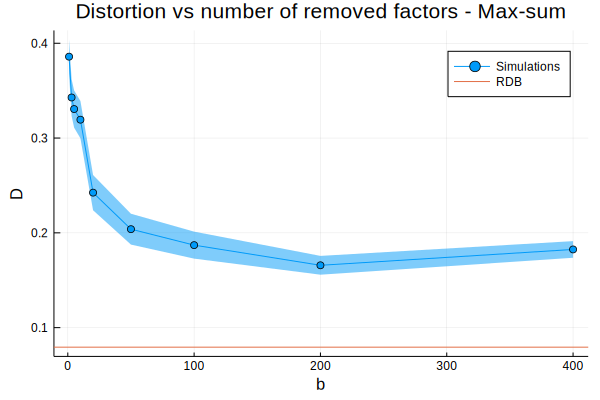

In [57]:
dist_ms = distortion.(sims_ms)
avg_dist_ms = mean.(dist_ms)
sd_dist_ms = std.(dist_ms) ./ sqrt(niter)
bound = rdbinv(1-m/n)
Plots.plot(bvals, avg_dist_ms, xlabel="b", ylabel="D", label="Simulations", ribbon=sd_dist_ms, marker=:circle)
Plots.hline!([bound], label="RDB")
title!("Distortion vs number of removed factors - Max-sum")